The fixed point is at: 230.84388551043995


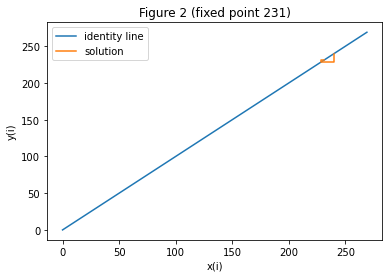

the calculated result is: 14.739073309008603
The fixed point is at: 250.03470608761515


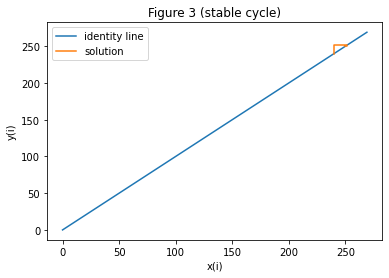

The fixed point is at: 247.74996126311893


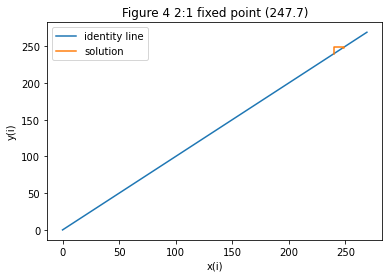

The fixed point is at: 247.74996144594377


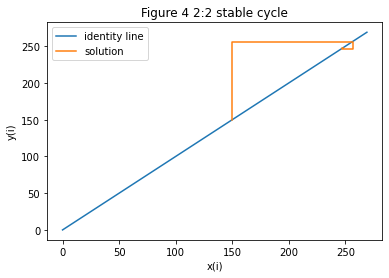

The fixed point is at: 158.52983655320384


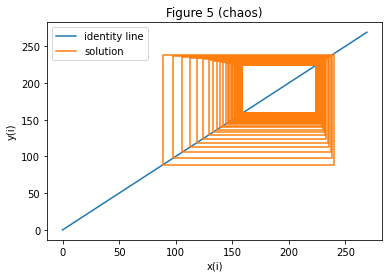

In [149]:
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities

def eqn5(n, ts, a, A, B1, T1, B2, T2, xmax): #equation for calculating fixed points
    M = np.exp((-n*ts)/T1)
    N = np.exp((-n*ts)/T2)
    L = 1 + (xmax * B1 * M)/(a*T1) + (xmax * B2 * N)/(a * T2)
    result = (A - B1 * M - B2 * N)/L
    return(result)

#I made this at the beginning to try to not deal with recursion, it gives similar results to the recursive equation
def updatingfunction(x_i, y_i, ts, n, a, A, B1, B2, T1, T2, DImin,numsteps): #based on equation 3 for calculating solutions
    X = np.zeros(numsteps) #preallocate the solution array
    Y = np.zeros(numsteps)
    X[0]=x_i
    Y[0]=y_i
    for i in np.arange(numsteps-1):
        X[i+1] = A - B1*np.exp(((X[i]/a)-n*ts)/T1) - B2*np.exp(((Y[i]/a)-n*ts)/T2)
        if X[i+1] < DImin:
            X[i+1] = DImin
        Y[i+1] = X[i]
        if Y[i+1] < DImin:
            Y[i+1] = DImin
    return(X,Y)

def eqn4(x_i, x_i1, ts, n, a, A, B1, B2, T1, T2, DImin):
    result = A - B1*np.exp(((x_i/a)-n*ts)/T1) - B2*np.exp(((x_i1/a)-n*ts)/T2)
    if (n*ts-result) < DImin:
        result = DImin
    return(result)

def cobweb_plot(funk, x_i, x_i1, ts, n, a, A, B1, B2, T1, T2, DImin, xrange, numsteps, xinit,yinit):
    plt.plot(xrange, xrange, label = 'identity line')

    # the cobweb plot script
    x = np.zeros(numsteps*2)
    y = np.zeros(numsteps*2)
    x[0] = xinit
    y[0] = yinit
    for i in np.arange(0,2*(numsteps-1),2):
        x[i+1] = x[i] # keep the same x coordinate
        y[i+1] = funk(x[i],x[i+1],ts, n, a, A, B1, B2, T1, T2, DImin)# the updating function
        x[i+2] = y[i+1] # move to the next x value
        y[i+2] = y[i+1] # keep the same y coordinate
    x[2*numsteps-1] = x[2*numsteps-2] # finish the last half-iteration
    y[2*numsteps-1] = funk(x[2*numsteps-2], x[2*numsteps-1],ts, n, a, A, B1, B2, T1, T2, DImin) # finish the last half-iteration
    plt.plot(x,y, label="solution")
    print("The fixed point is at: " + str(x[2*numsteps-2]))

        
#Parameters (in ms)
A = 270
B1 = 2441
B2 = 90.02
T1 = 19.6
T2 = 200.5
DImin = 53.5 
n = 1 
x_i = 0
x_i1 = 0
xinit = 240
yinit = 240

#Specific Parameters Figure 2
a = 1
ts = 400
   
xrange = np.arange(0,270,1) 
numsteps = 10
cobweb_plot(eqn4, x_i, x_i1, ts, n, a, A, B1, B2, T1, T2, DImin, xrange, numsteps, xinit,yinit)
plt.title("Figure 2 (fixed point 231)")
plt.xlabel("x(i)")
plt.ylabel("y(i)")
plt.legend()
plt.show()

#Numerically calculate fixed point:
xmax=270
result = eqn5(n, ts, a, A, B1, T1, B2, T2, xmax)
print("the calculated result is: "+str(result))


#Specific Parameters Figure 3
a = 1
ts = 276
n= 2

xrange = np.arange(0,270,1) 
numsteps = 10
cobweb_plot(eqn4, x_i, x_i1, ts, n, a, A, B1, B2, T1, T2, DImin, xrange, numsteps, xinit,yinit)
plt.title("Figure 3 (stable cycle)")
plt.xlabel("x(i)")
plt.ylabel("y(i)")
plt.legend()
plt.show()
    
#Specific Parameters Figure 4
a = 1
ts = 264
n = 2
    
xrange = np.arange(0,270,1) 
numsteps = 10
cobweb_plot(eqn4, x_i, x_i1, ts, n, a, A, B1, B2, T1, T2, DImin, xrange, numsteps, xinit,yinit)
plt.title("Figure 4 2:1 fixed point (247.7)")
plt.xlabel("x(i)")
plt.ylabel("y(i)")
plt.legend()
plt.show()

#Different initial values
xinit = 150
yinit = 150

xrange = np.arange(0,270,1) 
numsteps = 10
cobweb_plot(eqn4, x_i, x_i1, ts, n, a, A, B1, B2, T1, T2, DImin, xrange, numsteps, xinit,yinit)
plt.title("Figure 4 2:2 stable cycle")
plt.xlabel("x(i)")
plt.ylabel("y(i)")
plt.legend()
plt.show()


#Specific Parameters Figure 5
a = 1
ts = 50
n = 6
xinit = 240
yinit = 240


xrange = np.arange(0,270,1) 
numsteps = 100
cobweb_plot(eqn4, x_i, x_i1, ts, n, a, A, B1, B2, T1, T2, DImin, xrange, numsteps, xinit,yinit)
plt.title("Figure 5 (chaos)")
plt.xlabel("x(i)")
plt.ylabel("y(i)")
plt.legend()
plt.show()
    
